<a href="https://colab.research.google.com/github/Jaesu26/dacon-temp/blob/main/2023-02-26-%ED%92%8D%EB%A0%A5-%EB%B0%9C%EC%A0%84%EB%9F%89-%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 풍력 발전량 예측 AI 경진대회

In [28]:
!pip install mljar-supervised

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 11.1 MB/s eta 0:00:00
  Created wheel for mljar-supervised: filename=mljar_

## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') 

In [2]:
from google.colab import drive

drive.mount('/content/drive')  # 구글코랩과 구글드라이브 연결

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/풍력-발전량-예측

/content/drive/MyDrive/Colab Notebooks/풍력-발전량-예측


- 데이터 불러오기

In [106]:
df = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [17]:
df.head()

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,TRAIN_00000,27.8816,1013.6,46.8,2.4,232.4,0.00,False,0.0,1.180
1,TRAIN_00001,5.7540,1026.6,76.6,3.6,172.0,0.00,False,8.8,8.581
2,TRAIN_00002,20.8220,1016.2,64.8,2.2,206.0,0.06,False,23.0,3.978
3,TRAIN_00003,20.0758,1017.4,72.6,0.8,215.4,0.00,False,0.0,8.301
4,TRAIN_00004,7.5260,1023.2,82.8,1.2,158.0,0.00,False,15.0,1.692


- 변수 설명

`-` temperature: 기온 (섭씨)

`-` pressure: 기압 (hPa)

`-` humidity: 습도 ($0\% \sim 100\%$)

`-` wind_speed: 풍속 (m/s)

`-` wind_direction: 풍향 ($0^\circ \sim 360^\circ$)

`-` precipitation: 1시간 강수량 (mm)

`-` snowing: 눈 오는 상태 여부 (False, True)

`-` cloudiness: 구름이 하늘을 덟고 있는 정도

`-` target: 풍력 발전량 (GW)

- 기초 통계량 확인

In [6]:
df.describe()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,cloudiness,target
count,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000
mean,17.288476,1059.825712,68.948763,2.476970,166.578179,0.076572,25.749748,5.477028
std,7.192604,2544.132430,14.856929,1.359942,57.313099,0.193110,17.628612,3.217581
min,-0.208137,812.600000,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.712000,1012.600000,57.800000,1.400000,127.000000,0.000000,12.000000,2.956000
50%,16.530000,1016.800000,70.800000,2.200000,166.600000,0.000000,23.000000,4.837000
75%,22.559000,1021.000000,80.800000,3.200000,208.000000,0.060000,37.000000,7.436500
max,37.058000,201373.000000,100.000000,29.800000,338.000000,3.180000,93.600000,17.344000


In [8]:
df.isnull().sum()

id                0
temperature       0
pressure          0
humidity          0
wind_speed        0
wind_direction    0
precipitation     0
snowing           0
cloudiness        0
target            0
dtype: int64

`-` 결측치는 없다

- 무의미한 변수 제거

In [107]:
df = df.drop(['id', 'precipitation', 'cloudiness'], axis=1)
test = test.drop(['id', 'precipitation', 'cloudiness'], axis=1)

## EDA

In [10]:
sns.set_theme(style='white')

In [108]:
numeric_columns = df.columns[(df.dtypes == int) | (df.dtypes == float)]

<AxesSubplot:xlabel='snowing', ylabel='target'>

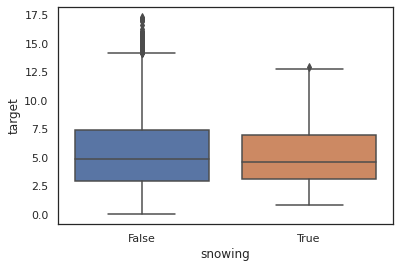

In [12]:
sns.boxplot(data=df, x='snowing', y='target')

<AxesSubplot:xlabel='snowing', ylabel='count'>

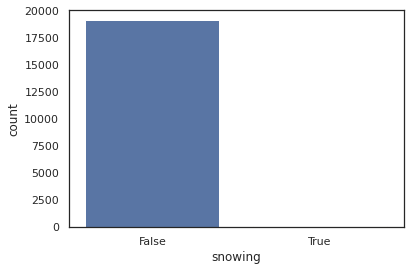

In [13]:
sns.countplot(data=df, x='snowing')

`-` 눈이 오는 여부는 발전량과 관련이 없으며 라벨 불균형도 심각하다

In [109]:
## 근사적인 z-score의 절댓값이 5를 넘어가는 이상치는 중앙값으로 대체
for col in numeric_columns:
    median, std = df[col].median(), (df[col].quantile(0.75) - df[col].quantile(0.25)) / 1.35
    z_upper, z_lower = median + 5*std, median - 5*std
    df.loc[(df.loc[:, col] > z_upper) | (df.loc[:, col] < z_lower), col] = median

    if col in test.columns:
        test.loc[(test.loc[:, col] > z_upper) | (test.loc[:, col] < z_lower), col] = median

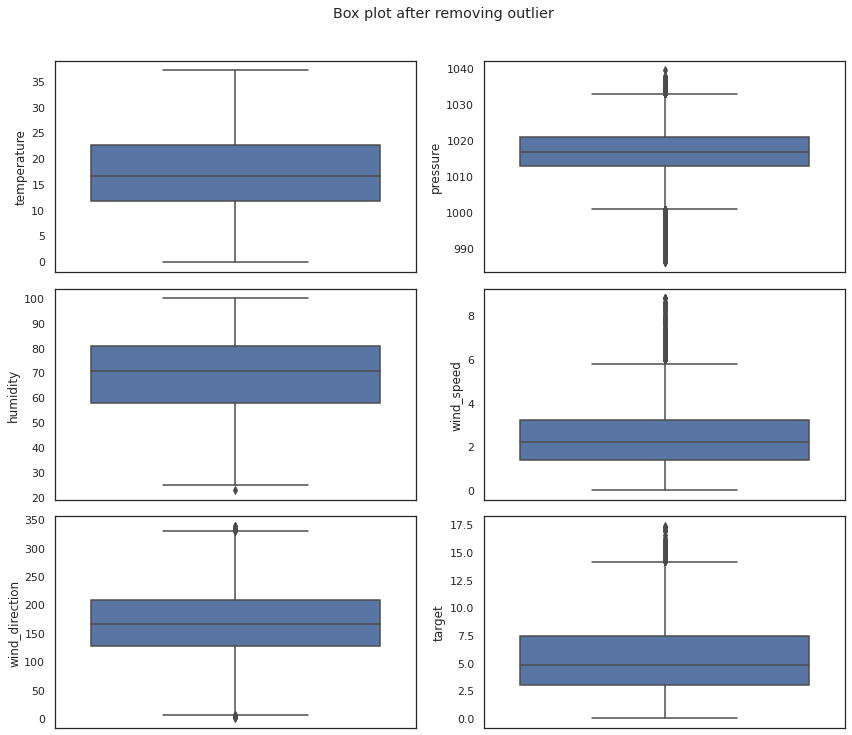

In [110]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
for col, ax in zip(numeric_columns, axs.flatten()):
    sns.boxplot(y=df[col], ax=ax)

fig.suptitle('Box plot after removing outlier', x=0.52, y=1.02)
fig.tight_layout()

`-` 몇몇 양적 변수에 심각한 이상치가 존재한다

`-` z-score의 절댓값이 5를 넘어가는 데이터는 학습에 악영향을 끼친다고 판단하여 제거했다

<AxesSubplot:xlabel='wind_direction', ylabel='wind_speed'>

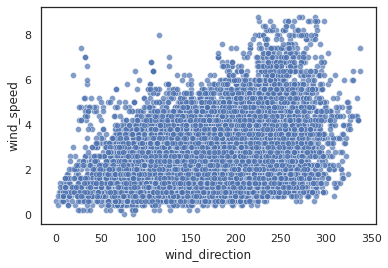

In [111]:
sns.scatterplot(data=df, x='wind_direction', y='wind_speed', alpha=0.7)

In [112]:
print(np.corrcoef(df['wind_direction'], df['wind_speed'])[0, 1])

0.36103872925770214


`-` 풍속과 풍향은 양의 상관관계를 가진다

<AxesSubplot:xlabel='humidity', ylabel='wind_speed'>

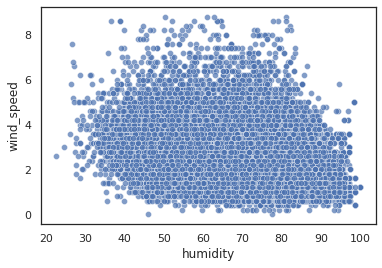

In [113]:
sns.scatterplot(data=df, x='humidity', y='wind_speed', alpha=0.7)

`-` 습도와 발전량은 매우 약한 음의 상관관계를 가진다

## 변수 선택

`-` `snowing` 변수에 경우 값의 대부분이 False이다

`-` 또한, True와 False에 따른 target 분포가 비슷하므로 사용하지 않겠다

`-` $발전량 = 0.5 \times 공기밀도 \times 날개면적 \times 풍속^3$

`-` 공기밀도는 압력에 비례하며 온도와 습도에 반비례한다

`-` $발전량 \propto 압력 \times \cfrac{1}{습도} \times \cfrac{1}{온도} \times 풍속^3$

`-` 풍향에 영향을 덜 받기 위해 풍력발전기를 바람이 불어오는 방향으로 움직인다

`-` 강수량과 흐린 정도는 발전량에 직접적인 영향을 끼치지 않는다

- 변수 생성

In [114]:
df['air_density'] = df['pressure'] / (df['humidity'] + 1) / (df['temperature'] + 273)
test['air_density'] = test['pressure'] / (test['humidity'] + 1) / (test['temperature'] + 273)

df['gw'] = df['air_density'] * df['wind_speed']
test['gw'] = test['air_density'] * test['wind_speed']

- 무의미한 변수 제거

In [115]:
df = df.drop(['snowing'], axis=1)
test = test.drop(['snowing'], axis=1)

## 모델 학습

In [116]:
from supervised.automl import AutoML

In [117]:
automl = AutoML(
    mode='Compete',
    algorithms=['LightGBM', 'Xgboost', 'CatBoost'],
    explain_level=0,
    eval_metric='mae',
    validation_strategy={
        'validation_type': 'kfold',
        'k_folds': 5,
        'shuffle': True,
        'stratify': False,
    }
)

In [118]:
target = df.pop('target')

In [119]:
automl.fit(df, target)

AutoML directory: AutoML_3
The task is regression with evaluation metric mae
AutoML will use algorithms: ['LightGBM', 'Xgboost', 'CatBoost']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 3 models
1_Default_LightGBM mae 2.090175 trained in 44.92 seconds
2_Default_Xgboost mae 2.134464 trained in 21.82 seconds
3_Default_CatBoost mae 2.168323 trained in 28.33 seconds
* Step not_so_random will try to check up to 27 models
13_LightGBM mae 2.187869 trained in 25.07 seconds
4_Xgboost mae 2.10281 trained in 19.69 seconds
22_CatBoost mae 2.119981 trained in 97.72 seconds
14_LightGBM mae 2.148291 trained in 7.11 secon

AutoML(algorithms=['LightGBM', 'Xgboost', 'CatBoost'], eval_metric='mae',
       explain_level=0, mode='Compete',
       validation_strategy={'k_folds': 5, 'shuffle': True, 'stratify': False,
                            'validation_type': 'kfold'})

In [120]:
pred = automl.predict(test)

In [121]:
submission['target'] = pred
submission.to_csv('./data/submission-autom3.csv', index=False)